# Distribute Data for Crossvalidation

## Things To Do:-

<ol>
    <li>Part 1</li>
    <li>Extract Zip File, Parent Folder would contain Train and Test folder</li>
    <li>Create a new folder crossvalidation</li>
    <li>Train Folder contains 46 subfolders and 1700 Images, Extract 25% of images from the train folder to crossvalidation</li>
    <li>Part 2</li>
    <li>Create a Dataframe from all th files in the Train, Each Image is 32 * 32, we need to create a row vector 1 * 1024 for each row, </li>
    <li>Add a numbered label to decide the category in which the row falls</li>
    <li>So final row would be 1 * 1025 and rows would be 46*1275, 46 folders and 1275 files in each</li>
    <li>Final size of Dataframe would be 58650 * 1025</li>
    <li>To final test the accuracy random pick any row of dataframe and check the image is of correct label</li>
</ol>



In [1]:
import pandas as pd
import numpy as np

from zipfile import ZipFile 

import os.path
from os import path
import shutil

In [2]:
# specifying the zip file name 
zip_file_name = "../data/DevanagariHandwrittenDigitsDataset.zip"

zip_folder_name = "../data/DevanagariHandwrittenDigitsDataset"

train_folder_name = "../data/DevanagariHandwrittenDigitsDataset/Train"

crossvalidation_folder_name = "../data/DevanagariHandwrittenDigitsDataset/crossvalidation"

zip_extract_location = "../data/"

percentage_of_files_to_extract = .25

sample_crossvalidation_file = crossvalidation_folder_name + "/digit_3/12595.png"

In [3]:
# Extract Zip file if we haven't extracted it yet

# Commented for safety
#if path.exists(zip_folder_name):
#    shutil.rmtree(zip_folder_name)

if not path.exists(zip_folder_name):
    
    # opening the zip file in READ mode 
    with ZipFile(zip_file_name, 'r') as zip: 
        
        # printing all the contents of the zip file 
        #zip.printdir() 

        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall(path=zip_extract_location) 
        print('Done!') 
else:
    print(zip_folder_name + " Exists, Already Extracted")


../data/DevanagariHandwrittenDigitsDataset Exists, Already Extracted


In [4]:
print(os.getcwd())

/Users/agaxmp04/Documents/JupyterNotebook/Jaskerat_ML_Course/Assignments


In [5]:
# define the name of the Crossvalidation directory to be created
crossvalidationpath = os.getcwd() + "/" + zip_folder_name + "/" + "crossvalidation"

try:
    os.mkdir(crossvalidationpath)
except OSError:
    # if the folder is already there, it would fail
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Creation of the directory <module 'posixpath' from '/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/posixpath.py'> failed


In [6]:
# Move 25% of files from Train to Crossvalidation folder

if not path.exists(sample_crossvalidation_file):
    
    for dirpath, dirnames, filenames in os.walk(train_folder_name):
        if len(filenames) != 0:
            #print(dirpath)
            #print(dirnames)
            #print(filenames)
            destination = crossvalidation_folder_name + "/" + str(dirpath.split(sep='/').pop())

            if not path.exists(destination):
                os.mkdir(destination)

            files_to_be_moved = int(len(filenames) * percentage_of_files_to_extract)
            #print(destination)
            #print(files_to_be_moved)
            for i in range(files_to_be_moved):
                src = dirpath + "/" + filenames[i]
                dest = destination + "/" + filenames[i]
                # do debug here, is it working
                shutil.move(src = src, dst = destination);
else:
    print("Already moved")


Already moved


# Part 2

In [7]:
import imageio
import visvis as vv

In [8]:
im = imageio.imread(str(sample_crossvalidation_file))

In [9]:
im.shape

(32, 32)

In [10]:
df = pd.DataFrame(data=im)

In [11]:
df.to_csv(r'export_df.csv',index = None, header=True)

In [12]:
def showImg(image):

    # Create figure and make it wider than the default
    fig = vv.figure()
    #fig.position.w = 700

    # Create first axes
    #a1 = vv.subplot(121)

    # Display an image
    texture2d = vv.imshow(image)
    texture2d.interpolate = True # if False the pixels are visible when zooming in

    # Enter main loop
    app = vv.use() # let visvis chose a backend for me
    app.Run()

In [13]:
#showImg(im)

In [14]:
imr = im.reshape((1,1024))

In [15]:
print(imr.shape)

np_im = np.array(imr)
im_im2 = np.append(np_im, [[34]], axis=1)

print(im_im2)
print(im_im2.shape)

print(im_im2[:,:-1].shape)
#print(im_im2[:,:-1].reshape((32,32)))
#im_im3 = im_im2[:,:-1].reshape((32,32))

# which category added
print(im_im2[:,-1:])
print(im_im2[:,-1:][0][0])

(1, 1024)
[[ 0  0  0 ...  0  0 34]]
(1, 1025)
(1, 1024)
[[34]]
34


In [16]:
def getImageFromImgCat(np_image):
    return np_image[:,:-1].reshape((32,32))

In [17]:
def getCategoryFromImgCat(np_image):
    return np_image[:,-1:][0][0]

In [18]:
sample_crossvalidation_file.split("/").pop(-2)

'digit_3'

In [19]:
count = 0
images = []
lables = []
rows=[]
for dirpath, dirnames, filenames in os.walk(train_folder_name):
    #print(dirpath)
    #print(len(filenames))
    if len(filenames) != 0:
        for i in range(len(filenames)):
        #for i in range(2):
            name = filenames[i]
            directory_name = dirpath.split('/')[-1]
            image_path = src = dirpath + "/" + name
            image = imageio.imread(str(image_path))
            image = image.reshape((1,1024))
            np_image = np.array(image)
            #np_image = np.append(np_image, [[count]], axis=1)
            #cv_df.loc[i + count*2] = [np_image, directory_name]
            
            #cv_df = cv_df.append({'Image_Category':np_image, 'Category':directory_name}, ignore_index=True)
            #images.append(np_image)
            #lables.append(directory_name)
            rows.append([np_image, directory_name])
            #print(directory_name)
            #print(image_path)
        count += 1

In [20]:
cv_df = pd.DataFrame(data=rows, columns=['image', 'label'])

In [21]:
cv_df.to_csv(r'crossvalidation_dataframe.csv',index = None, header=True)

In [22]:
cv_df.head()

,image,label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",digit_0
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",digit_0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",digit_0
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",digit_0
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",digit_0


In [23]:
cv_df.shape

(12750, 2)

In [24]:
cv_df.iloc[18]

image    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
label                                              digit_0
Name: 18, dtype: object

In [25]:
cv_df.iloc[18][0].shape
np.mean(cv_df.iloc[18][0])

(1, 1024)

42.6005859375

In [26]:
#filtered_image = (cv_df['image'].iloc[18]).reshape((32,32))
#showImg(filtered_image)

In [27]:
cv_df['label'].iloc[18]

'digit_0'

In [28]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn
from sklearn.utils import shuffle

from collections import defaultdict
from builtins import range, input

In [29]:
np.seterr(invalid="raise")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [99]:
from sklearn.model_selection import train_test_split
def get_data(dataframe, limit=None):
    
    dataframe = shuffle(dataframe)
    image_data = np.array(dataframe['image'].values)
    image_data = np.array(list(map(lambda x: x[0], image_data)))
    X = image_data / 255.0 # data is from 0..255
    Y = cv_df['label'].values
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y


In [100]:
X, Y = get_data(cv_df, 10000)
#Ntrain = len(Y) // 2
#Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
#Xtest, Ytest = X[Ntrain:], Y[Ntrain:]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)


In [103]:
X.shape
Y.shape
Xtrain.shape
Xtest.shape
Ytrain.shape
Ytest.shape

(10000, 1024)

(10000,)

(8000, 1024)

(2000, 1024)

(8000,)

(2000,)

In [104]:
# We need the rows to be the Features, so either Transpose the X or make rowvar= False,
# so that it could Transpose internally
def getCovarianceMat(X, D, smoothing=1e-2):
    cov_smooth = np.eye(D)*smoothing
    #if not X:
    #    return cov_smooth
    
    return np.cov(X.T) + cov_smooth

In [105]:
def getNormalMean(X,D):
    if len(X) == 0:
        return np.random.rand(D, D)
    else:
        return X

In [106]:
np.random.rand(X.shape[1]).shape
np.array([.1]*X.shape[1]).shape

D =4
np.random.rand(D, D).shape

(1024,)

(1024,)

(4, 4)

In [107]:
arr = np.random.rand(X.shape[1])
arr.shape
getNormalMean(np.random.rand(X.shape[1]), 1024).shape
getNormalMean([], 1024).shape

(1024,)

(1024,)

(1024, 1024)

In [108]:
class Bayes():
    
    def __init__(self, unique_classes):
        
        self.labels=unique_classes
        
    def fit(self, X, Y, smoothing=1e-2):
        N, D = X.shape
        self.gaussians = defaultdict(str)
        self.priors = dict()
        for c in self.labels:
            current_x = X[Y == c]
            #current_x = getNormalMean(current_x, D)
            #print(current_x.shape)
            if len(current_x) != 0:
                self.gaussians[c] = {
                    'mean': current_x.mean(axis=0),
                    'var': getCovarianceMat(current_x, D, smoothing)
                }
                self.priors[c] = float(len(Y[Y == c]) + 1) / len(Y)

    def score(self, X, Y):
        #df = self.predict(X)
        #P = np.argmax(df, axis=1)
        Pre, keys = model.predict(Xtrain)
        df = pd.DataFrame([[v] for k, v in Pre.items()], 
                   columns=['score'])
        arr = df['score'].values
        arr_len = arr.shape[0]
        npar = arr[0]
        for i in range(arr_len-1):
            npar = np.vstack((npar, arr[i]))
        P = np.argmax(npar, axis=0)
        P = list(map(lambda x: keys[0][x], P))
        #print(P)
        return np.mean(P == Y)

    def predict(self, X):
        N, D = X.shape
        K = len(self.labels)
        #P = np.zeros((N, K))
        P = defaultdict(str)
        #df = pd.DataFrame() 
        keys = list(self.gaussians.keys())
        print(keys)
        for c in self.labels:
            if c in keys:
                mean = self.gaussians[c]['mean']
                #print(f"mean shape {mean.shape}")
                cov = self.gaussians[c]['var']
                logpdf = mvn.logpdf(X, mean=mean, cov=cov)
                prior = np.log(self.priors[c])
                #P[:,c] = logpdf + np.log(self.priors[c])
                num = logpdf + np.log(self.priors[c])
                #argmax = np.argmax(P, axis=1)

                #print(f"logpdf.shape {logpdf.shape}")
                #print(f"prior.shape {prior}")
                #print(f"num.shape {num.shape}")
                P[c] = num
        return (P,[keys])

In [109]:
set(Ytest)

{'digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7'}

In [110]:

model = Bayes(set(Y))
t0 = datetime.now()
model.fit(Xtrain, Ytrain)
print("Training time:", (datetime.now() - t0))


Training time: 0:00:00.211885


In [111]:
P,keys = model.predict(Xtrain)

['digit_5', 'digit_2', 'digit_6', 'digit_3', 'digit_1', 'digit_0', 'digit_4', 'digit_7']


In [112]:
P

defaultdict(str,
            {'digit_5': array([844.20618677, 722.49207509, 538.55517318, ..., 824.95885737,
                    574.00440708, 802.14245406]),
             'digit_2': array([865.2465426 , 705.18054241, 760.65720236, ..., 837.2804802 ,
                    592.58763336, 799.17631516]),
             'digit_6': array([889.32524955, 702.09081538, 538.67413592, ..., 833.44640918,
                    651.47134527, 816.77055072]),
             'digit_3': array([860.93329453, 824.8634367 , 554.5851313 , ..., 830.15815662,
                    622.37642503, 796.46893917]),
             'digit_1': array([848.36996417, 689.94723249, 507.89819906, ..., 846.15054583,
                    606.75796127, 831.57819349]),
             'digit_0': array([843.98126372, 713.80781696, 516.61789166, ..., 842.52034338,
                    611.23000378, 783.11535841]),
             'digit_4': array([858.50512794, 722.44454062, 548.24979964, ..., 882.77419811,
                    610.89288064, 812.6

In [113]:
keys[0]

['digit_5',
 'digit_2',
 'digit_6',
 'digit_3',
 'digit_1',
 'digit_0',
 'digit_4',
 'digit_7']

In [114]:
df = pd.DataFrame([[k, v] for k, v in P.items()], 
                   columns=['key','score'])
df

,key,score
0,digit_5,"[844.2061867689947, 722.4920750872016, 538.555..."
1,digit_2,"[865.2465425990546, 705.1805424084043, 760.657..."
2,digit_6,"[889.3252495508548, 702.090815379658, 538.6741..."
3,digit_3,"[860.9332945333506, 824.8634367037541, 554.585..."
4,digit_1,"[848.3699641675835, 689.9472324868003, 507.898..."
5,digit_0,"[843.9812637217125, 713.8078169567491, 516.617..."
6,digit_4,"[858.5051279394384, 722.4445406222768, 548.249..."
7,digit_7,"[868.253185879925, 720.3487325143368, 513.0567..."


In [115]:
arr = df['score'].values

In [118]:

npar = np.array([])
#arr.shape
#arr[0].shape
#npar = np.concatenate((arr[0], arr[1]))
#npar = np.vstack((arr[0], arr[1]))
#print(npar.shape)
#print(np.argmax(npar, axis=0))
arr_len = arr.shape[0]
npar = arr[0]
for i in range(arr_len-1):
    npar = np.vstack((npar, arr[i]))
    
npar.shape
args = np.argmax(npar, axis=0)
args
plist = list(map(lambda x: keys[0][x], args))

(8, 8000)

array([3, 4, 2, ..., 7, 3, 5])

In [121]:
np.sum(plist == Ytrain)

1135

In [122]:

t0 = datetime.now()
print("Train accuracy:", model.score(Xtrain, Ytrain))
print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

t0 = datetime.now()
print("Test accuracy:", model.score(Xtest, Ytest))
print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))


['digit_5', 'digit_2', 'digit_6', 'digit_3', 'digit_1', 'digit_0', 'digit_4', 'digit_7']
Train accuracy: 0.141875
Time to compute train accuracy: 0:00:03.446359 Train size: 8000
['digit_5', 'digit_2', 'digit_6', 'digit_3', 'digit_1', 'digit_0', 'digit_4', 'digit_7']
Test accuracy: 0.0
Time to compute test accuracy: 0:00:03.477436 Test size: 2000


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Text(0.5, 1.0, 'digit_5')

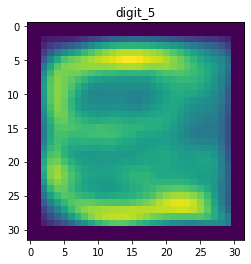

Text(0.5, 1.0, 'digit_2')

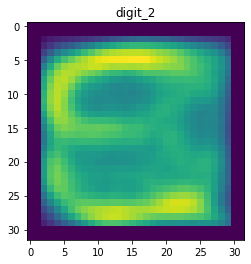

Text(0.5, 1.0, 'digit_6')

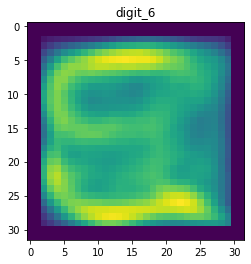

Text(0.5, 1.0, 'digit_3')

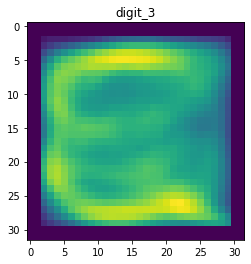

Text(0.5, 1.0, 'digit_1')

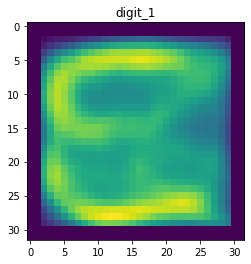

Text(0.5, 1.0, 'digit_0')

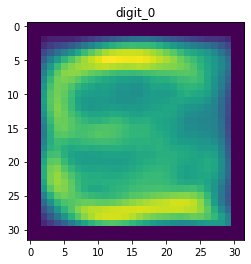

Text(0.5, 1.0, 'digit_4')

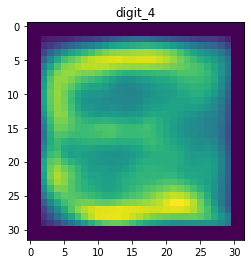

Text(0.5, 1.0, 'digit_7')

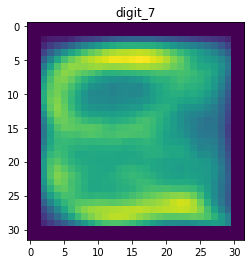

In [123]:

# plot the mean of each class
for c in model.labels:
    mean = model.gaussians[c]['mean']
    cov = model.gaussians[c]['var']
    plt.imshow(mean.reshape((32, 32)))
    plt.title(c)
    plt.show()

In [41]:
gaussians = defaultdict(str)

In [42]:
gaussians['asd'] = {
    'mean':1,
    'var':2
}

In [43]:
gaussians

defaultdict(str, {'asd': {'mean': 1, 'var': 2}})

In [44]:
gaussians['asd']['mean']

1

In [52]:
'asd' in list(gaussians.keys())

True